In [1]:
import csv
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def chisquare(df, label):
    l = len(df)
    w = len(df[0])
    mean = np.divide(list(df.sum(axis = 0)), l)
    chi = []
    for j in range(w):
        observed_t = [[0 for _ in range(2)] for _ in range(2)]
        expected_t = [[0 for _ in range(2)] for _ in range(2)]
        sum_t = [0 ,0]
        chi_value = 0
        for i in range(l):
            if(df[i][j] <= mean[j]):
                if(label[i] == 0):
                    observed_t[0][0] += 1
                else:
                    observed_t[0][1] += 1
            else:
                if(label[i] == 0):
                    observed_t[1][0] += 1
                else:
                    observed_t[1][1] += 1
        sum_t[0] = list(np.sum(observed_t, axis = 1))
        sum_t[1] = list(np.sum(observed_t, axis = 0))
        
        for i in range(2):
            for j in range(2):
                expected_t[i][j] = sum_t[0][i]*sum_t[1][j]/l
        
        for i in range(2):
            for j in range(2):
                chi_value += (expected_t[i][j] - observed_t[i][j])**2/expected_t[i][j]
        chi.append(chi_value)
    return chi
#chisquare(ds.iloc[:, :20].to_numpy(), ds[20].to_numpy())

In [3]:
def ginisplit(df, label):
    l = len(df)
    w = len(df[0])
    mean = np.divide(list(df.sum(axis = 0)), l)
    gini = []
    for j in range(w):
        observed_t = [[0 for _ in range(2)] for _ in range(2)]
        gini_index = [0 ,0]
        gini_split = 0
        for i in range(l):
            if(df[i][j] <= mean[j]):
                if(label[i] == 0):
                    observed_t[0][0] += 1
                else:
                    observed_t[0][1] += 1
            else:
                if(label[i] == 0):
                    observed_t[1][0] += 1
                else:
                    observed_t[1][1] += 1
        
        sum_t = list(np.sum(observed_t, axis = 1))
        
        for i in range(2):
            gini_index[i] = 1 - (observed_t[i][0]/sum_t[i])**2 - (observed_t[i][1]/sum_t[i])**2 
            
        gini_split = sum_t[0]*gini_index[0]/l + sum_t[1]*gini_index[1]/l
        gini.append(gini_split)
    return gini
#ginisplit(ds.iloc[:, :20].to_numpy(), ds[20].to_numpy())

In [4]:
def infogain(df, label):
    l = len(df)
    w = len(df[0])
    mean = np.divide(list(df.sum(axis = 0)), l)
    g = [0 for _ in range(2)]
    for i in range(l):
        if(label[i] == 0):
            g[0] += 1
        else:
            g[1] += 1
    
    entropy_t = 0
    
    for i in range(2):   
        prob = g[i]/l
        entropy_t -=  prob * math.log(prob, 2) 
    
    info = []
    for j in range(w):
        observed_t = [[0 for _ in range(2)] for _ in range(2)]
        entropy_s = [0]*2
        entropy_index = [0 ,0]
        entropy_split = 0
        for i in range(l):
            if(df[i][j] <= mean[j]):
                if(label[i] == 0):
                    observed_t[0][0] += 1
                else:
                    observed_t[0][1] += 1
            else:
                if(label[i] == 0):
                    observed_t[1][0] += 1
                else:
                    observed_t[1][1] += 1
        
        sum_t = list(np.sum(observed_t, axis = 1))
        
        for i in range(2):
            entropy_s[i] -= (observed_t[i][0]/sum_t[i]) * math.log(observed_t[i][0]/sum_t[i], 2) + (observed_t[i][1]/sum_t[i]) * math.log(observed_t[i][1]/sum_t[i], 2)
            
        info_gain = entropy_t - (sum_t[0]/sum(sum_t)) * entropy_s[0] - (sum_t[1]/sum(sum_t)) * entropy_s[1]
        
        info.append(info_gain)
        
    return info
#infogain(ds.iloc[:, :20].to_numpy(), ds[20].to_numpy())

In [5]:
def classify(df, label):
    l = len(df)
    w = len(df[0])
    mean = np.divide(list(df.sum(axis = 0)), l)
    missi = []
    for j in range(w):
        observed_t = [[0 for _ in range(2)] for _ in range(2)]
        error_node = [0 ,0]

        for i in range(l):
            if(df[i][j] <= mean[j]):
                if(label[i] == 0):
                    observed_t[0][0] += 1
                else:
                    observed_t[0][1] += 1
            else:
                if(label[i] == 0):
                    observed_t[1][0] += 1
                else:
                    observed_t[1][1] += 1
        
        sum_t = list(np.sum(observed_t, axis = 1))
        
        for i in range(2):
            error_node[i] = 1 - max(observed_t[i][0]/sum_t[i], observed_t[i][1]/sum_t[i])
            
        error = min(error_node[0], error_node[1])
        
        missi.append(error)
    return missi
#classify(ds.iloc[:, :20].to_numpy(), ds[20].to_numpy())

In [6]:
def gainratio(df, label):
    
    gain_split = infogain(df, label)
    l = len(df)
    w = len(df[0])
    mean = np.divide(list(df.sum(axis = 0)), l)

    #gai = []
    split = []
      
    for j in range(w):
        observed_t = [[0 for _ in range(2)] for _ in range(2)]
        expected_t = [[0 for _ in range(2)] for _ in range(2)]
        sum_t = [0 ,0]

        for i in range(l):
            if(df[i][j] <= mean[j]):
                if(label[i] == 0):
                    observed_t[0][0] += 1
                else:
                    observed_t[0][1] += 1
            else:
                if(label[i] == 0):
                    observed_t[1][0] += 1
                else:
                    observed_t[1][1] += 1
                      
        sum_t = list(np.sum(observed_t, axis = 1))
          
        if sum_t[0]!=0 and sum_t[1]!=0:
            split_info = - (sum_t[0]/sum(sum_t)) * math.log(sum_t[0]/sum(sum_t), 2) - (sum_t[1]/sum(sum_t)) * math.log(sum_t[1]/sum(sum_t), 2)
        else:
            split_info = 0
          
        split.append(split_info)
          
    gai = list(np.divide(gain_split, split))
      
    return gai
#gainratio(ds.iloc[:, :20].to_numpy(), ds[20].to_numpy())

C:\Users\Hitesh Aryan Acharya\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


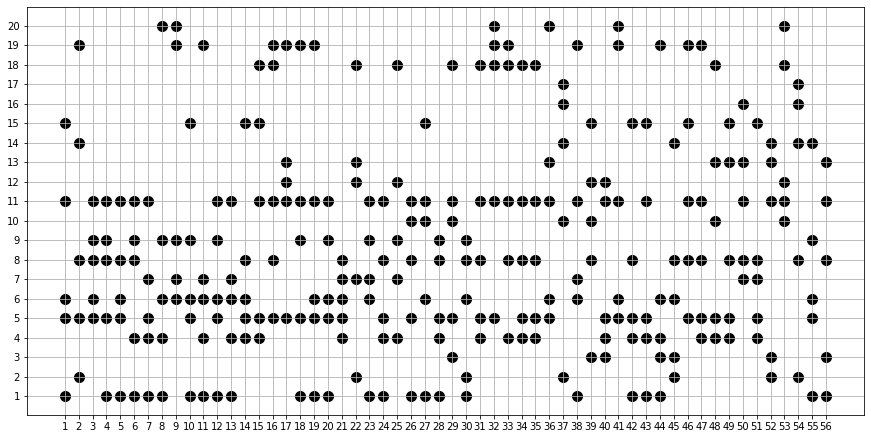

In [7]:
chi, mapped, chiq, indx, x, y = [0]*56, [0]*56, [0]*56, [0]*56, [], []
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for i in range(56):
    filename = '{}.csv'.format(i+1)
    ds = pd.read_csv(filename, header = None)

    chi[i] = chisquare(ds.iloc[:, :20].to_numpy(), ds[20].to_numpy())
    
for i in range(56):
    mapped[i] = list(zip(chi[i], index))
    
for i in range(56):
    mapped[i].sort(key = lambda x: x[0], reverse = True)

for i in range(56):
    chiq[i], indx[i] = zip(*mapped[i])
    
for i in range(56):
    y += indx[i][0:5]
    x += [i+1]*5

plt.figure(figsize=(15,7.5))
plt.scatter(x, y, color = 'black', marker = '.', s = 400)
plt.xticks(np.arange(1, 57, 1))
plt.yticks(np.arange(min(y), max(y)+1, 1))
plt.grid(True)
plt.show()

C:\Users\Hitesh Aryan Acharya\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


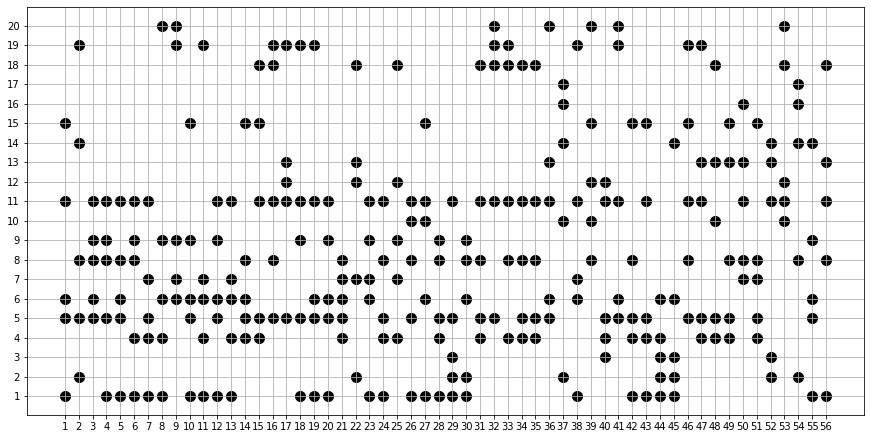

In [12]:
gini, mapped, giniq, indx, x, y = [0]*56, [0]*56, [0]*56, [0]*56, [], []
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for i in range(56):
    filename = '{}.csv'.format(i+1)
    ds = pd.read_csv(filename, header = None)

    gini[i] = ginisplit(ds.iloc[:, :20].to_numpy(), ds[20].to_numpy())
    
for i in range(56):
    mapped[i] = list(zip(gini[i], index))
    
for i in range(56):
    mapped[i].sort(key = lambda x: x[0], reverse = False)

for i in range(56):
    chiq[i], indx[i] = zip(*mapped[i])
    
for i in range(56):
    y += indx[i][0:5]
    x += [i+1]*5

plt.figure(figsize=(15,7.5))
plt.scatter(x, y, color = 'black', marker = '.', s = 400)
plt.xticks(np.arange(1, 57, 1))
plt.yticks(np.arange(min(y), max(y)+1, 1))
plt.grid(True)
plt.show()

C:\Users\Hitesh Aryan Acharya\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


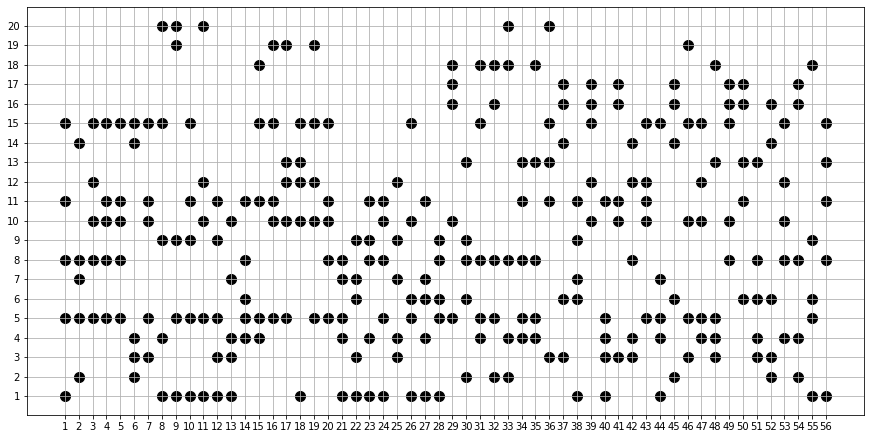

In [13]:
missi, mapped, missiq, indx, x, y = [0]*56, [0]*56, [0]*56, [0]*56, [], []
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for i in range(56):
    filename = '{}.csv'.format(i+1)
    ds = pd.read_csv(filename, header = None)

    missi[i] = classify(ds.iloc[:, :20].to_numpy(), ds[20].to_numpy())
    
for i in range(56):
    mapped[i] = list(zip(missi[i], index))
    
for i in range(56):
    mapped[i].sort(key = lambda x: x[0], reverse = False)

for i in range(56):
    chiq[i], indx[i] = zip(*mapped[i])
    
for i in range(56):
    y += indx[i][0:5]
    x += [i+1]*5

plt.figure(figsize=(15,7.5))
plt.scatter(x, y, color = 'black', marker = '.', s = 400)
plt.xticks(np.arange(1, 57, 1))
plt.yticks(np.arange(min(y), max(y)+1, 1))
plt.grid(True)
plt.show()

C:\Users\Hitesh Aryan Acharya\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


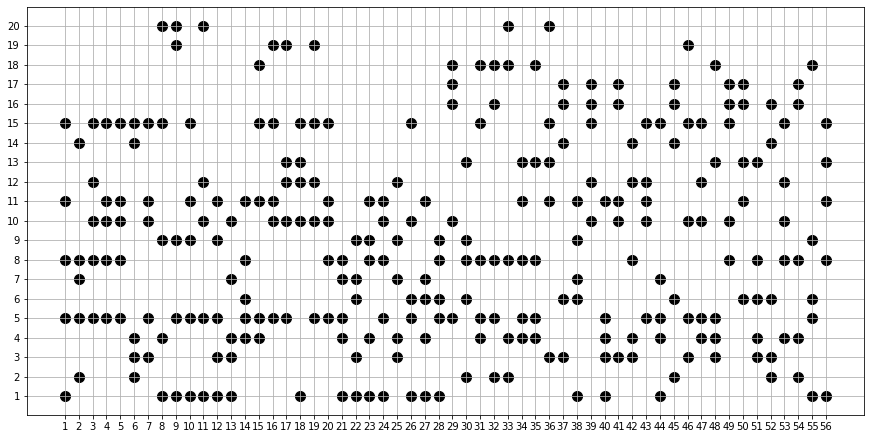

In [14]:
info, mapped, infoq, indx, x, y = [0]*56, [0]*56, [0]*56, [0]*56, [], []
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for i in range(56):
    filename = '/Users/Hitesh Aryan Acharya/Desktop/OnlineClass/3-2/Data Mining/Assignment/Dataset/{}.csv'.format(i+1)
    ds = pd.read_csv(filename, header = None)

    info[i] = classify(ds.iloc[:, :20].to_numpy(), ds[20].to_numpy())
    
for i in range(56):
    mapped[i] = list(zip(info[i], index))
    
for i in range(56):
    mapped[i].sort(key = lambda x: x[0], reverse = False)

for i in range(56):
    chiq[i], indx[i] = zip(*mapped[i])
    
for i in range(56):
    y += indx[i][0:5]
    x += [i+1]*5

plt.figure(figsize=(15,7.5))
plt.scatter(x, y, color = 'black', marker = '.', s = 400)
plt.xticks(np.arange(1, 57, 1))
plt.yticks(np.arange(min(y), max(y)+1, 1))
plt.grid(True)
plt.show()

C:\Users\Hitesh Aryan Acharya\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


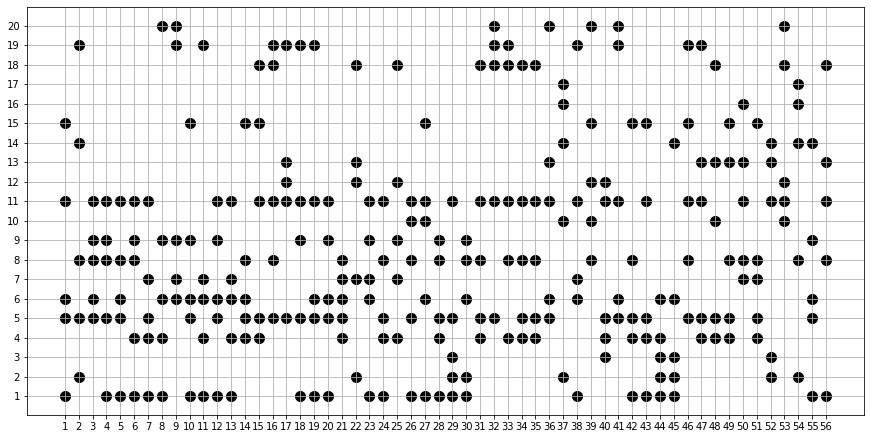

In [16]:
gai, mapped, gaiq, indx, x, y = [0]*56, [0]*56, [0]*56, [0]*56, [], []
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for i in range(56):
    filename = '/Users/Hitesh Aryan Acharya/Desktop/OnlineClass/3-2/Data Mining/Assignment/Dataset/{}.csv'.format(i+1)
    ds = pd.read_csv(filename, header = None)

    gai[i] = ginisplit(ds.iloc[:, :20].to_numpy(), ds[20].to_numpy())
    
for i in range(56):
    mapped[i] = list(zip(gai[i], index))
    
for i in range(56):
    mapped[i].sort(key = lambda x: x[0], reverse = False)

for i in range(56):
    chiq[i], indx[i] = zip(*mapped[i])
    
for i in range(56):
    y += indx[i][0:5]
    x += [i+1]*5

plt.figure(figsize=(15,7.5))
plt.scatter(x, y, color = 'black', marker = '.', s = 400)
plt.xticks(np.arange(1, 57, 1))
plt.yticks(np.arange(min(y), max(y)+1, 1))
plt.grid(True)
plt.show()